# I haven't known this.

## NDArray

### Hands on NDArray

In [1]:
from mxnet import ndarray as nd

In [2]:
nd.zeros((3, 4))


[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
<NDArray 3x4 @cpu(0)>

In [3]:
x = nd.ones((3, 4))
x


[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]
<NDArray 3x4 @cpu(0)>

In [4]:
nd.array([[1, 2], [3, 4]])


[[ 1.  2.]
 [ 3.  4.]]
<NDArray 2x2 @cpu(0)>

In [5]:
y = nd.random_normal(0, 1, shape=(3,4))

In [6]:
y


[[ 2.21220636  0.7740038   1.04344046  1.18392551]
 [ 1.89171135 -1.23474145 -1.771029   -0.45138445]
 [ 0.57938355 -1.85608196 -1.9768796  -0.20801921]]
<NDArray 3x4 @cpu(0)>

In [7]:
y.shape

(3, 4)

In [8]:
y.size

12

In [9]:
x + y


[[ 3.21220636  1.77400374  2.04344034  2.18392563]
 [ 2.89171124 -0.23474145 -0.771029    0.54861557]
 [ 1.57938361 -0.85608196 -0.9768796   0.7919808 ]]
<NDArray 3x4 @cpu(0)>

In [10]:
x * y


[[ 2.21220636  0.7740038   1.04344046  1.18392551]
 [ 1.89171135 -1.23474145 -1.771029   -0.45138445]
 [ 0.57938355 -1.85608196 -1.9768796  -0.20801921]]
<NDArray 3x4 @cpu(0)>

In [11]:
nd.exp(y)


[[ 9.13585091  2.16843081  2.83896756  3.26717448]
 [ 6.63070631  0.29090998  0.17015781  0.63674599]
 [ 1.78493774  0.15628375  0.13850074  0.81219143]]
<NDArray 3x4 @cpu(0)>

In [12]:
nd.dot(x, y.T) #x和y形状不匹配，无法直接进行矩阵乘法


[[ 5.21357632 -1.56544352 -3.4615972 ]
 [ 5.21357632 -1.56544352 -3.4615972 ]
 [ 5.21357632 -1.56544352 -3.4615972 ]]
<NDArray 3x3 @cpu(0)>

### broadcasting

In [13]:
a = nd.arange(3).reshape((3,1))
b = nd.arange(2).reshape((1,2))
print('a:', a)
print('b:', b)
print('a+b:', a+b)

a: 
[[ 0.]
 [ 1.]
 [ 2.]]
<NDArray 3x1 @cpu(0)>
b: 
[[ 0.  1.]]
<NDArray 1x2 @cpu(0)>
a+b: 
[[ 0.  1.]
 [ 1.  2.]
 [ 2.  3.]]
<NDArray 3x2 @cpu(0)>


### 跟NumPy的转换

In [14]:
import numpy as np

In [15]:
x = np.ones((2,3))

In [16]:
y = nd.array(x) # numpy -> mxnet

In [17]:
z = y.asnumpy() #mxnet -> numpy

In [18]:
print([z, y])

[array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]], dtype=float32), 
[[ 1.  1.  1.]
 [ 1.  1.  1.]]
<NDArray 2x3 @cpu(0)>]


### 替换操作

In [19]:
x = nd.ones((3, 4))
y = nd.ones((3, 4))

before = id(y)
y = y + x
id(y) == before

False

用`y += x`再来一次:

In [20]:
x = nd.ones((3, 4))
y = nd.ones((3, 4))

before = id(y)
y += x
id(y) == before

True

现有数组不会复用，我们也可以用 `x[:] = x + y` ，或者 `x += y` 达到这个目的

### 截取

In [21]:
x = nd.arange(0,9).reshape((3,3))
print('x: ', x)
x[1:3]

x:  
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]
<NDArray 3x3 @cpu(0)>



[[ 3.  4.  5.]
 [ 6.  7.  8.]]
<NDArray 2x3 @cpu(0)>

In [22]:
x[1,2] = 9.0
x


[[ 0.  1.  2.]
 [ 3.  4.  9.]
 [ 6.  7.  8.]]
<NDArray 3x3 @cpu(0)>

In [23]:
x = nd.arange(0,9).reshape((3,3))
print('x: ', x)
x[1:2,1:3]

x:  
[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]]
<NDArray 3x3 @cpu(0)>



[[ 4.  5.]]
<NDArray 1x2 @cpu(0)>

In [24]:
x[1:2,1:3] = 9.0
x


[[ 0.  1.  2.]
 [ 3.  9.  9.]
 [ 6.  7.  8.]]
<NDArray 3x3 @cpu(0)>

In [25]:
nd.arange(0, 4).reshape((2,2))


[[ 0.  1.]
 [ 2.  3.]]
<NDArray 2x2 @cpu(0)>

## 使用autograd来自动求导

在机器学习中，我们通常使用梯度下降（gradient descent）来更新模型参数从而求解。损失函数关于模型参数的梯度指向一个可以降低损失函数值的方向，我们不断地沿着梯度的方向更新模型从而最小化损失函数。

为此MXNet提供autograd包来自动化求导过程。虽然大部分的深度学习框架要求编译计算图来自动求导，mxnet.autograd可以对正常的命令式程序进行求导，它每次在后端实时创建计算图，从而可以立即得到梯度的计算方法。

In [26]:
import mxnet.ndarray as nd

In [27]:
import mxnet.autograd as ag

In [28]:
x = nd.array([[1, 2], [3, 4]])

In [29]:
x.attach_grad()

In [30]:
with ag.record():
    y = x * 2
    z = y * x

In [31]:
z.backward()

In [32]:
print('x.grad: ', x.grad)

x.grad:  
[[  4.   8.]
 [ 12.  16.]]
<NDArray 2x2 @cpu(0)>


In [33]:
x.grad == 4*x #比较x.grad和4*x的每个元素是否相等.


[[ 1.  1.]
 [ 1.  1.]]
<NDArray 2x2 @cpu(0)>

### 对控制流求导

In [34]:
def f(a):
    b = a * 2
    while nd.norm(b).asscalar() < 1000:#b的平方和开根号,然后转化为标量
        b = b * 2
    if nd.sum(b).asscalar() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [35]:
a = nd.random_normal(shape=3)
a.attach_grad()

In [36]:
with ag.record():
    c = f(a)
c.backward()

In [37]:
a.grad


[ 204800.  204800.  204800.]
<NDArray 3 @cpu(0)>

In [38]:
c / a


[ 204800.  204800.  204800.]
<NDArray 3 @cpu(0)>

In [39]:
a.grad == c / a


[ 1.  1.  1.]
<NDArray 3 @cpu(0)>

## 线性回归 — 从0开始

### 创建数据集
这里我们使用一个数据集来尽量简单地解释清楚，真实的模型是什么样的。具体来说，我们使用如下方法来生成数据；随机数值 `X[i]`，其相应的标注为 `y[i]`：

`y[i] = 2 * X[i][0] - 3.4 * X[i][1] + 4.2 + noise`

这里噪音(`noise`)服从均值0和标准差为0.01的正态分布。

In [40]:
from mxnet import ndarray as nd
from mxnet import autograd

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(shape=y.shape)

注意到`X`的每一行是一个长度为2的向量，而`y`的每一行是一个长度为1的向量（标量）。

In [41]:
print(X[0], y[0]) #对于NDArray来说, 单索引代表取整行


[-0.02261727  0.57461417]
<NDArray 2 @cpu(0)> 
[ 2.2103312]
<NDArray 1 @cpu(0)>


In [42]:
X.shape

(1000, 2)

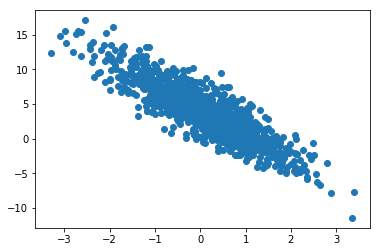

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()

### 数据读取
当我们开始训练神经网络的时候，我们需要不断读取数据块。这里我们定义一个函数它每次返回`batch_size`个随机的样本和对应的目标。我们通过python的yield来构造一个迭代器。

In [44]:
import random
batch_size = 10
def data_iter():
    # 产生一个随机索引
    idx = list(range(num_examples))
    random.shuffle(idx)
    for i in range(0, num_examples, batch_size):
        j = nd.array(idx[i:min(i+batch_size,num_examples)])
        yield nd.take(X, j), nd.take(y, j)

下面代码读取第一个随机数据块

In [45]:
for data, label in data_iter():
    print(data, label)
    break


[[-0.98526436 -0.87221128]
 [-0.4892422   0.82852226]
 [ 0.06442814  1.63567686]
 [-0.17675017 -1.74766469]
 [ 1.59653282  1.0441364 ]
 [ 0.31445166 -0.31143191]
 [-0.12898901  0.95471138]
 [-1.02437937 -2.21507716]
 [ 2.03052187  0.51919103]
 [ 0.21727817 -0.51341814]]
<NDArray 10x2 @cpu(0)> 
[ 5.21893072  0.4059622  -1.228127    9.78747463  3.84101677  5.88136578
  0.69978881  9.67193317  6.49900579  6.38893175]
<NDArray 10 @cpu(0)>


### 初始化模型参数
下面我们随机初始化模型参数

In [46]:
w = nd.random_normal(shape=(num_inputs, 1)) #列长度1就是输出的个数1
b = nd.zeros((1,))
params = [w, b]

In [47]:
for param in params:
    param.attach_grad()

### 定义模型
线性模型就是将输入和模型的权重（w）相乘，再加上偏移（b）：

In [48]:
def net(X):
    return nd.dot(X, w) + b

### 损失函数
我们使用常见的平方误差来衡量预测目标和真实目标之间的差距。

In [49]:
def square_loss(yhat, y):
    # 注意这里我们把y变形成yhat的形状来避免矩阵形状的自动转换
    return (yhat - y.reshape(yhat.shape)) ** 2

### 优化
> 'S' in 'SGD':

> sto·chas·tic /stəˈkastik/ `randomly determined; having a random probability distribution or pattern that may be analyzed > statistically but may not be predicted precisely.`

虽然线性回归有显式解，但绝大部分模型并没有。所以我们这里通过随机梯度下降来求解。每一步，我们将模型参数沿着梯度的反方向走特定距离，这个距离一般叫学习率（learning rate）

In [50]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad #前面解释过[:]表示原地操作, 避免多余的内存开销

### 训练
现在我们可以开始训练了。训练通常需要迭代数据数次，在这里使用epochs表示迭代总次数；一次迭代中，我们每次随机读取固定数个数据点，计算梯度并更新模型参数。

In [51]:
# 模型函数
def real_fn(X):
    return true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b

训练完成后，我们可以比较学得的参数和真实参数:

In [52]:
epochs = 5
learning_rate = .001
for e in range(epochs):
    total_loss = 0
    for data, label in data_iter():
        with ag.record():
            output = net(data) #注意: w,b两个参数才是自变量
            loss = square_loss(output, label) #注意: w,b两个参数才是自变量
        loss.backward()
        SGD(params, learning_rate)
        
        total_loss += nd.sum(loss).asscalar()
        
    print('Epoch %d, average loss: %f' % (e, total_loss/num_examples))

Epoch 0, average loss: 7.441554
Epoch 1, average loss: 0.143115
Epoch 2, average loss: 0.002884
Epoch 3, average loss: 0.000155
Epoch 4, average loss: 0.000102


In [53]:
true_w,w.reshape((1,2))

([2, -3.4], 
 [[ 1.99992418 -3.39992428]]
 <NDArray 1x2 @cpu(0)>)

In [54]:
true_b, b

(4.2, 
 [ 4.19988441]
 <NDArray 1 @cpu(0)>)

## 线性回归——使用Gluon

前一章我们仅仅使用了`ndarray`和`autograd`来实现线性回归，这一章我们仍然实现同样的模型，但是使用高层抽象包`gluon`。

### 创建数据集
我们生成同样的数据集

In [55]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon

num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
y = true_w[0] * X[:, 0] + true_w[1] * X[:, 1] + true_b
y += .01 * nd.random_normal(shape=y.shape)

### 数据读取
但这里使用data模块来读取数据

In [56]:
batch_size = 10
dataset = gluon.data.ArrayDataset(X, y)
data_iter = gluon.data.DataLoader(dataset, batch_size, shuffle=True)

读取跟前面一致：

In [57]:
for data, label in data_iter:
    print(data, label)
    break


[[-1.01660335  0.34730676]
 [-1.89960217  1.46686757]
 [ 2.55817795  0.86794704]
 [ 1.15782356 -0.88564777]
 [ 0.5628621   1.2546134 ]
 [ 1.37262428  1.40573037]
 [-0.19525373  1.82036543]
 [-0.00988925 -2.08647037]
 [ 1.80944777  2.22467184]
 [ 0.67805862 -1.81038213]]
<NDArray 10x2 @cpu(0)> 
[  0.97517419  -4.58775377   6.37582016   9.52266312   1.05827916
   2.15505075  -2.38553786  11.27322483   0.25604403  11.70799732]
<NDArray 10 @cpu(0)>


### 定义模型

之前一章中，当我们从0开始训练模型时，需要先声明模型参数，然后再使用它们来构建模型。但gluon提供大量预定义的层，我们只需要关注使用哪些层来构建模型。例如线性模型就是使用对应的Dense层；之所以称为dense层，是因为输入的所有节点都与后续的节点相连。在这个例子中仅有一个输出，但在大多数后续章节中，我们会用到具有多个输出的网络。

我们之后还会介绍如何构造任意结构的神经网络，但对于初学者来说，构建模型最简单的办法是利用Sequential来所有层串起来。输入数据之后，Sequential会依次执行每一层，并将前一层的输出，作为输入提供给后面的层。首先我们定义一个空的模型：

In [58]:
net = gluon.nn.Sequential()

然后我们加入一个`Dense`层，它唯一必须定义的参数就是输出节点的个数，在线性模型里面是1.

In [59]:
net.add(gluon.nn.Dense(1)) #此处不需要管输入(input)

In [60]:
print(net)

Sequential(
  (0): Dense(None -> 1, linear)
)


### 初始化模型参数
在使用前net我们必须要初始化模型权重，这里我们使用默认随机初始化方法（之后我们会介绍更多的初始化方法）。

In [61]:
net.initialize()

### 损失函数
gluon提供了平方误差函数：

In [62]:
square_loss = gluon.loss.L2Loss()

### 优化
同样我们无需手动实现随机梯度下降，我们可以创建一个Trainer的实例，并且将模型参数传递给它就行。

In [63]:
trainer = gluon.Trainer(
    net.collect_params(), 'sgd', {'learning_rate': 0.1}
)

### 训练
使用gluon使模型训练过程更为简洁。我们不需要挨个定义相关参数、损失函数，也不需使用随机梯度下降。gluon的抽象和便利的优势将随着我们着手处理更多复杂模型的愈发显现。不过在完成初始设置后，训练过程本身和前面没有太多区别，唯一的不同在于我们不再是调用SGD，而是trainer.step来更新模型（此处一并省略之前绘制损失变化的折线图和散点图的过程，有兴趣的同学可以自行尝试）。

In [64]:
epochs = 5
batch_size = 10
for e in range(epochs):
    total_loss = 0
    for data, label in data_iter:
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size) #不用直接调用SGD
        total_loss += nd.sum(loss).asscalar()
    print("Epoch %d, average loss: %f" % (e, total_loss/num_examples))

Epoch 0, average loss: 0.872848
Epoch 1, average loss: 0.000050
Epoch 2, average loss: 0.000051
Epoch 3, average loss: 0.000051
Epoch 4, average loss: 0.000050


In [65]:
dense = net[0] #取得net里面的第一层(也是唯一一层)
true_w, dense.weight.data()

([2, -3.4], 
 [[ 2.00054169 -3.40049982]]
 <NDArray 1x2 @cpu(0)>)

In [66]:
true_b, dense.bias.data()

(4.2, 
 [ 4.1989398]
 <NDArray 1 @cpu(0)>)

In [67]:
net

Sequential(
  (0): Dense(2 -> 1, linear)
)

In [68]:
net[0]

Dense(2 -> 1, linear)

In [69]:
dense.weight

Parameter dense0_weight (shape=(1, 2), dtype=<class 'numpy.float32'>)

In [70]:
dense.weight.data()


[[ 2.00054169 -3.40049982]]
<NDArray 1x2 @cpu(0)>

In [71]:
dense.bias

Parameter dense0_bias (shape=(1,), dtype=<class 'numpy.float32'>)

## 多类逻辑回归——从零开始

演示这个模型的常见数据集是手写数字识别MNIST，它长这个样子。


这里我们用了一个稍微复杂点的数据集，它跟MNIST非常像，但是内容不再是分类数字，而是服饰。我们通过gluon的data.vision模块自动下载这个数据。



In [72]:
from mxnet import gluon
from mxnet import ndarray as nd

def transform(data, label):
    return data.astype('float32')/255, label.astype('float32')
mnist_train = gluon.data.vision.FashionMNIST(train=True, transform=transform)
mnist_test = gluon.data.vision.FashionMNIST(train=False, transform=transform)

打印一个样本的形状和它的标号

In [73]:
type(mnist_train[0])

tuple

In [74]:
len(mnist_train[0])

2

In [75]:
data, label = mnist_train[0]
('example shape: ', data.shape, 'label:', label)

('example shape: ', (28, 28, 1), 'label:', 2.0)

In [76]:
_, label1 = mnist_train[1]

In [77]:
label1

9.0

In [78]:
type(label)

numpy.float32

`data`是1张图片的输入.

注意`data`是一个3维的数组.下面是`data`的结构:

```
[[[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  
  ...
  
  [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.01568628]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.24313726]
  [ 0.23921569]
  [ 0.08235294]
  [ 0.11372549]
  [ 0.09019608]
  [ 0.2       ]
  [ 0.53333336]
  [ 0.23921569]
  [ 0.        ]
  [ 0.        ]
  
  ...
  
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]]
<NDArray 28x28x1 @cpu(0)>
  ```

我们画出前几个样本的内容，和对应的文本标号

In [79]:
type(mnist_train[0:9])

tuple

In [80]:
len(mnist_train[0:9])

2

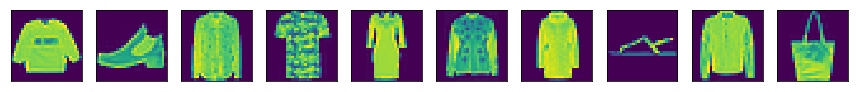

['pullover', 'ankle boot', 'shirt', 't-shirt', 'dress,', 'coat', 'coat', 'sandal', 'coat', 'bag']


In [81]:
import matplotlib.pyplot as plt

def show_images(images):
    n = images.shape[0]
    _, figs = plt.subplots(1, n, figsize=(15, 15))
    for i in range(n):
        figs[i].imshow(images[i].reshape((28, 28)).asnumpy())
        figs[i].axes.get_xaxis().set_visible(False)
        figs[i].axes.get_yaxis().set_visible(False)
    plt.show()

def get_text_labels(label):
    text_labels = [
        't-shirt', 'trouser', 'pullover', 'dress,', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [text_labels[int(i)] for i in label]

data, label = mnist_train[0:10] #取10张图片的输入
show_images(data)
print(get_text_labels(label))

### 数据读取

虽然我们可以像前面那样通过`yield`来定义获取批量数据函数，这里我们直接使用`gluon.data`的`DataLoader`函数，它每次yield一个批量。

In [82]:
batch_size = 256
train_data = gluon.data.DataLoader(mnist_train, batch_size, shuffle=True) #一次yield出256张图片的输入
test_data = gluon.data.DataLoader(mnist_test, batch_size, shuffle=False)

### 初始化模型参数
跟线性模型一样，每个样本会表示成一个向量。我们这里数据是 28 \* 28 大小的图片，所以输入向量的长度是 $28 \times 28 = 784$。因为我们要做多类分类，我们需要对每一个类预测这个样本属于此类的概率。因为这个数据集有10个类型，所以输出应该是长为10的向量。这样，我们需要的权重将是一个 784 \* 10 的矩阵：

In [83]:
num_inputs = 784
num_outputs = 10

W = nd.random_normal(shape=(num_inputs, num_outputs))
b = nd.random_normal(shape=num_outputs)

params = [W, b]

In [84]:
for param in params:
    param.attach_grad()

### 定义模型
在线性回归教程里，我们只需要输出一个标量`yhat`使得尽可能的靠近目标值。但在这里的分类里，我们需要属于每个类别的概率。这些概率需要值为正，而且加起来等于1. 而如果简单的使用$ \hat{y} = Wx $, 我们不能保证这一点。一个通常的做法是通过`softmax`函数来将任意的输入归一化成合法的概率值。

In [85]:
from mxnet import nd
def softmax(X):
    exp = nd.exp(X)
    # 假设exp是矩阵，这里对行进行求和，并要求保留axis 1，
    # 就是返回 (nrows, 1) 形状的矩阵
    partition = exp.sum(axis=1, keepdims=True)
    return exp / partition

可以看到，对于随机输入，我们将每个元素变成了非负数，而且每一行加起来为1。

In [86]:
X = nd.random_normal(shape=(2,5))
X_prob = softmax(X)
print(X)
print(X_prob)
print(X_prob.sum(axis=1))


[[ 0.63395035 -0.37305322  0.78124088 -1.12790012  0.69496393]
 [ 0.55241621  1.17211711 -0.08394501 -2.08366799  0.84687358]]
<NDArray 2x5 @cpu(0)>

[[ 0.26605347  0.09719252  0.30827367  0.04568851  0.28279179]
 [ 0.20826279  0.38702977  0.11021572  0.01492021  0.2795715 ]]
<NDArray 2x5 @cpu(0)>

[ 1.  1.]
<NDArray 2 @cpu(0)>


现在我们可以定义模型了：

In [87]:
def net(X):
    return softmax(nd.dot(X.reshape((-1,num_inputs)), W) + b) #-1这个不可能出现的行数表示让系统自己取判断,本例中为batch_size 

In [88]:
print('W>>>', W)
print('b>>>', b)

W>>> 
[[ 0.53105432  0.70177597 -0.74951595 ...,  0.59643304  0.79070371
  -0.04376583]
 [-0.05834173  1.03049481 -0.11668406 ..., -1.15005136  1.10499918
   0.30967948]
 [-0.37867823 -1.05498433 -0.26673636 ...,  0.62162733 -0.81660008
  -0.15916686]
 ..., 
 [ 0.71608436 -1.48858368  1.5933609  ...,  0.62034327  0.65362054
  -0.35291404]
 [-0.25106525  1.38896573 -1.53285682 ..., -2.01650524 -0.95258242
   0.25097841]
 [-1.18692124  0.11907593  0.49000555 ...,  0.40534505  0.13684179
  -0.00433262]]
<NDArray 784x10 @cpu(0)>
b>>> 
[ 0.82381767 -0.31846237 -0.00572143 -1.37508631 -0.07048063 -1.67742646
  0.3319276   1.14506447  2.24885893 -0.18532014]
<NDArray 10 @cpu(0)>


### 叉熵损失函数

我们需要定义一个针对预测为概率值的损失函数。其中最常见的是交叉熵损失函数，它将两个概率分布的负交叉熵作为目标值，最小化这个值等价于最大化这两个概率的相似度。

具体来说，我们先将真实标号表示成一个概率分布，例如如果`y=1`，那么其对应的分布就是一个除了第二个元素为1其他全为0的长为10的向量，也就是 `yvec=[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]`。那么交叉熵就是`yvec[0]*log(yhat[0])+...+yvec[n]*log(yhat[n])`。注意到`yvec`里面只有一个1，那么前面等价于`log(yhat[y])`。所以我们可以定义这个损失函数了

In [89]:
def cross_entropy(yhat, y):
    return - nd.pick(nd.log(yhat), y)

nd.pick()解释: https://mxnet.incubator.apache.org/api/python/ndarray/ndarray.html?highlight=.pick#mxnet.ndarray.pick

### 计算精度

给定一个概率输出，我们将预测概率最高的那个类作为预测的类，然后通过比较真实标号我们可以计算精度：

In [90]:
def accuracy(output, label):
    return nd.mean(output.argmax(axis=1)==label).asscalar()

我们可以评估一个模型在这个数据上的精度。

In [91]:
def evaluate_accuracy(data_iterator, net):
    acc = 0.
    for data, label in data_iterator:
        output = net(data)
        acc += accuracy(output, label)
    return acc / len(data_iterator)


因为我们随机初始化了模型，所以这个模型的精度应该大概是`1/num_outputs = 0.1`.

In [92]:
evaluate_accuracy(test_data, net)

0.067675781249999997

### 训练

训练代码跟前面的线性回归非常相似：

In [93]:
import sys
sys.path.append('..')
from utils import SGD
from mxnet import autograd

learning_rate = .1

for epoch in range(5):
    train_loss = 0.
    train_acc = 0.
    for data, label in train_data:
        with autograd.record():
            output = net(data)
#             print('data>>>', data.shape)
#             print('W>>>', W.shape)
#             print('b>>>', b.shape)
#             print('output>>>', output.shape)
#             print('nd.log(output)>>>', nd.log(output).shape)
#             print('label>>>', label.shape)
            loss = cross_entropy(output, label)
#             print('loss>>>', loss.shape)
        loss.backward()
        # 将梯度做平均，这样学习率会对batch size不那么敏感
        SGD(params, learning_rate/batch_size)

        train_loss += nd.mean(loss).asscalar()
        train_acc += accuracy(output, label)
        
    test_acc = evaluate_accuracy(test_data, net)
    print("Epoch %d. Loss: %f, Train acc %f, Test acc %f" % (
        epoch, train_loss/len(train_data), train_acc/len(train_data), test_acc))

Epoch 0. Loss: 3.632601, Train acc 0.452593, Test acc 0.582617
Epoch 1. Loss: 1.931263, Train acc 0.626219, Test acc 0.654199
Epoch 2. Loss: 1.591276, Train acc 0.675576, Test acc 0.690332
Epoch 3. Loss: 1.420772, Train acc 0.702643, Test acc 0.704980
Epoch 4. Loss: 1.305722, Train acc 0.720274, Test acc 0.723242
